{{< video https://www.youtube.com/embed/ayXb5HI_fiQ >}}



This is my partner's and my submission for the competition SCUDEM - SIMIODE Challenge Using Differential Equations Modeling (<https://qubeshub.org/community/groups/scudem>). The problem statement can be found below, but the general goal was to create a physics-based differential equation model that could properly determine the ideal moment to perform a [bike throw](<https://www.bicycling.com/training/a20017965/how-to-outsprint-the-competition-with-a-bike-throw/>) in a race. The video above describes our approach for creating the differential equation as well at the answer to the questions posed in the problem statement.

## Code


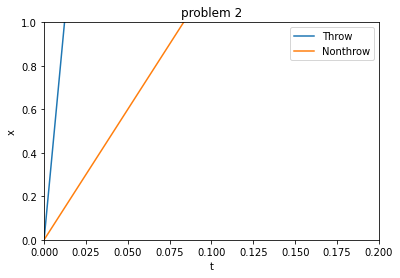

In [1]:
from numpy import *
from numpy import array
from pylab import *

x=0
vr=float(input("Enter the velocity of rider after the throw: "))
vx=11*12-10*vr
y_0=array([x,vx])

def RK2(f,a,b,y0,step):
    t=linspace(a,b,step)  #set t as array from a to be with steps
    h=t[1]-t[0] #step size
    Y=[y0] #set Y as initial conditions
    N=len(t)
    n=0
    y=y0
    while n<=N-2 :
        y_rk2=y+h*0.5*f(y,t[n])    
        y=y+h*f(y_rk2,t[n]+h*0.5)
        Y.append(y)
        n=n+1    #midpoint method , repeat for every steps
    Y=array(Y)
    return Y,t

def throw(y,t):
    m=77
    rho=1.23
    cd=0.88
    A=0.36
    g=9.8
    ck=0.004
    a=(-1*rho*cd*A/(2*m))*((y[1])**2)-(g*ck)  #DE equation
    v=y[1]
    f=array([v,a])
    return f

def nonthrow(t):
    y=12*t  
    return y


a=RK2(throw,0,1,y_0,1000)   #number of step is 1000 between 0s to 1s
X=a[0][:,0]
t=a[1]
plot(t,X)
axis([0, 0.2, 0, 1])
X2=nonthrow(t)
plot(t,X2,'-')

legend(['Throw','Nonthrow'])
xlabel('t')
ylabel('x')
title ('problem 2')
show()

## Problem Statement

In the 2021 Brabantse Pijl Dames bicycle race, sprinter Demi Vollering was leading the race but
lost when Ruth Winder came from behind at the last moment[1,2]. Demi Vollering begun to
celebrate too soon when Ruth Winder pushed her bike forward (known as a “bike throw” [3]),
her front wheel crossed the finish line millimeters ahead of Vollering’s wheel. The finish of the
race was so close that most people, including Winder, assumed that Vollering won. It was not
until after the official finish line records were reviewed that Winder was declared the winner.

The source of confusion was described by a reporter, Mikkel Conde, who said, “I'm trying to
wrap my head around how it's possible to be ahead right before the line, lose on the line and then
immediately be ahead again right after the line.” [1] In this case the “line” consists of two wide
white lines on either side of the official finish line. From photographs taken by press officials
Vollering appeared to be ahead at the start of the first white line and ahead at the end of the
second white line. At the official finish line between them, though, Winder was ahead.

This example highlights how important the bike throw can be at the finish of a bike race. The
question your team should explore through use of a mathematical model is to determine just
how precise the timing must be for the bike throw to be effective. When should a rider stop
pedaling and shift her weight backwards to thrust the bike forward? What is the best position for
the cyclist and what are the trade-offs for a more precarious hand position that might provide
more movement at the expense of less control? Also, what is the time interval that a professional
cyclist must exploit for this move to be effective? Additionally, what is the maximum amount of
time that can be made up? You should keep in mind that professional cyclists are moving at a
speed where friction can be considerable which may impact the timing when the rider should
stop pedaling and thrust the bicycle forward